In [42]:
from soundsig.sound import BioSound 
from soundsig.sound import WavFile
import numpy as np
from scipy.signal import spectrogram, butter, sosfilt, sosfiltfilt, correlate
from scipy.io.wavfile import read, write
import IPython.display as ipd
# import sys
from collections import Counter
import os
import pandas as pd

import matplotlib.pyplot as plt

In [14]:
print(os.getcwd())
os.chdir('/Users/williamwood/Downloads/')


/Users/williamwood/Downloads


File name: Y175_d91_8.wav, bird name: Y175


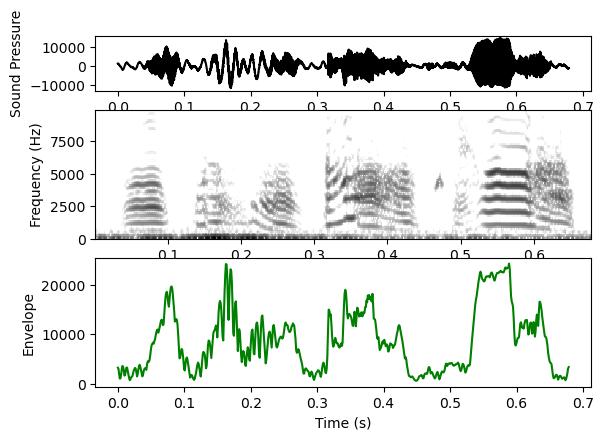

File name: w590_44193.22091055_12_28_6_8_11_128700.wav, bird name: w590


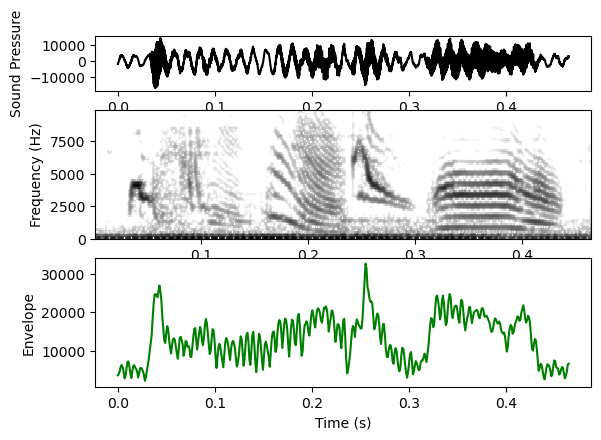

File name: or308_43823.28796596_12_24_7_59_56_128700.wav, bird name: or308


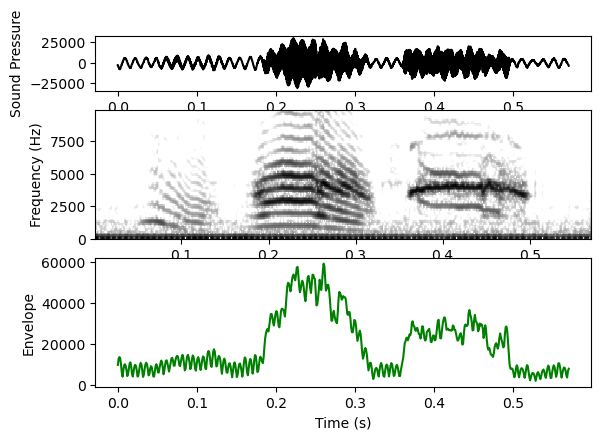

In [55]:
file_names = list(['Y175_d91_8.wav', 'w590_44193.22091055_12_28_6_8_11_128700.wav', 'or308_43823.28796596_12_24_7_59_56_128700.wav'])
time_indexes = list([[.45, .485],[.241, .3],[.35, .5]])
# biosounds = list()
for file_name, time_index in zip(file_names,time_indexes):
    birdname = file_name.split('_')[0]
    print(f'File name: {file_name}, bird name: {birdname}')
    soundIN = WavFile(file_name)
    # soundIn = BioSound(soundIN.data, soundIN.rate)
    # biosounds.append(BioSound(soundIN.data, soundIN.sample_rate))
    calltype = 'pure_tone'
    soundIN.plot()
    plt.show()
    # soundIn = []


syllabe length: 1543, tiem points: (19845, 21388)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                Bird b'Y175'    Call Type b'pure_tone'


/opt/miniconda3/lib/python3.9/site-packages/soundsig/sound.py:541: UserWarning: Trying to register the cmap 'SpectroColorMap' which already exists.
  mpl.colormaps.register(cmap=spec_cmap, force=True)


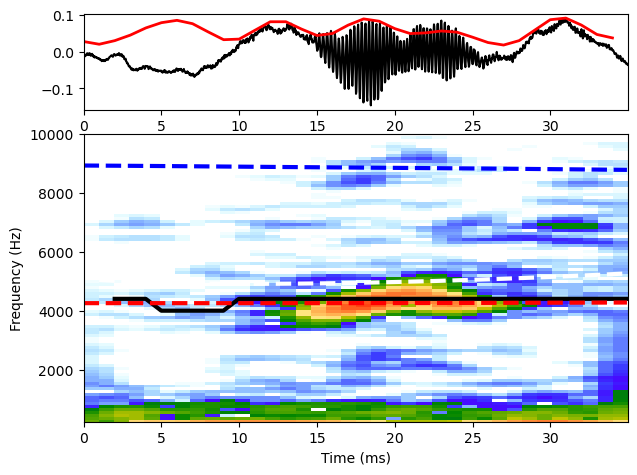

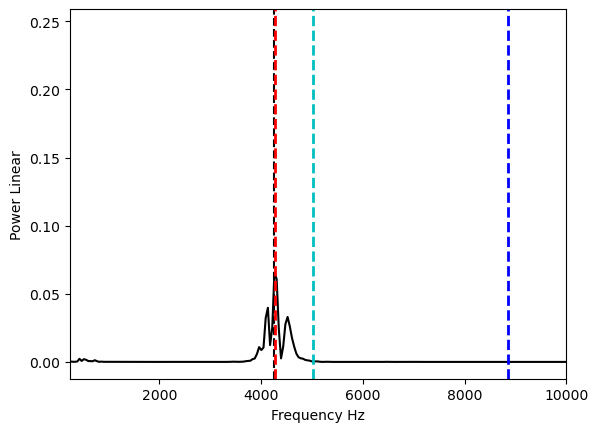

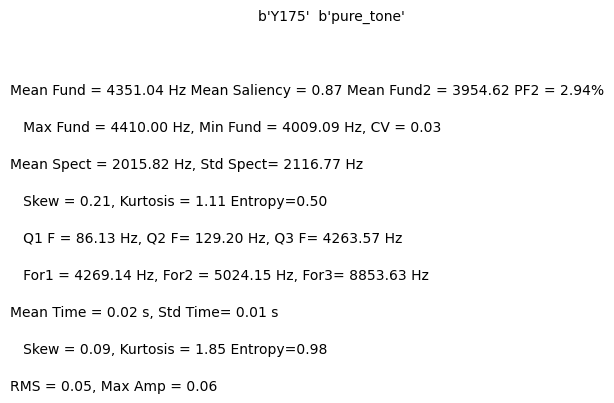

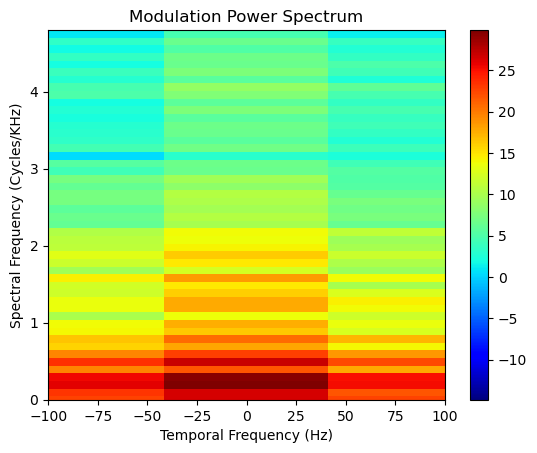

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
syllabe length: 2602, tiem points: (10628, 13230)


/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                Bird b'w590'    Call Type b'pure_tone'


/opt/miniconda3/lib/python3.9/site-packages/soundsig/sound.py:541: UserWarning: Trying to register the cmap 'SpectroColorMap' which already exists.
  mpl.colormaps.register(cmap=spec_cmap, force=True)


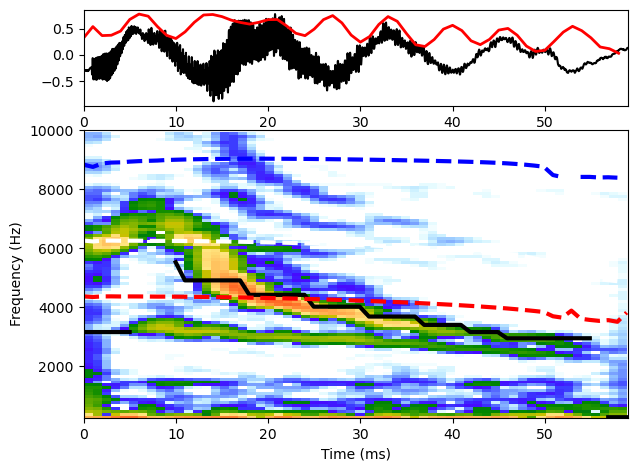

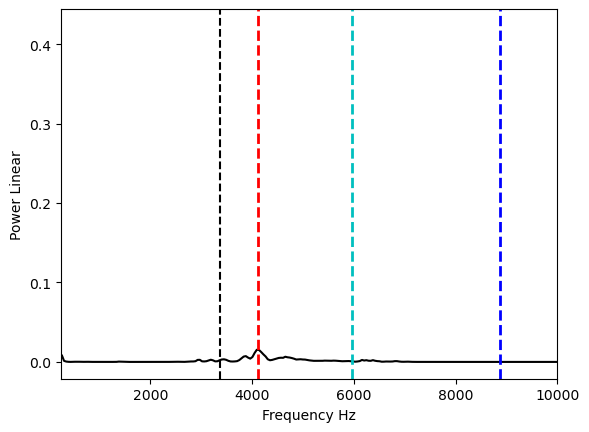

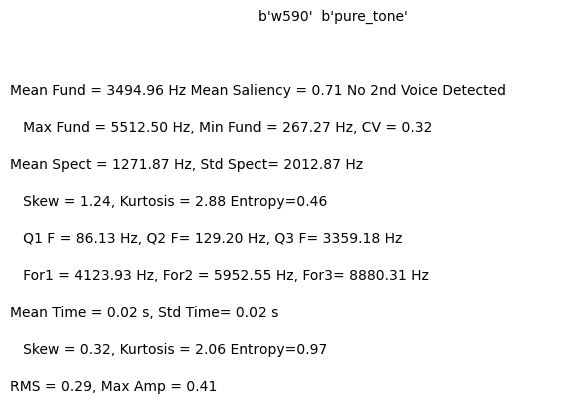

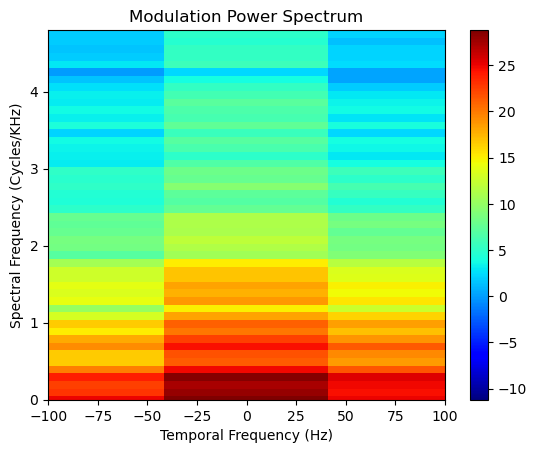

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
syllabe length: 6616, tiem points: (15434, 22050)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                Bird b'or308'    Call Type b'pure_tone'


/opt/miniconda3/lib/python3.9/site-packages/soundsig/sound.py:541: UserWarning: Trying to register the cmap 'SpectroColorMap' which already exists.
  mpl.colormaps.register(cmap=spec_cmap, force=True)


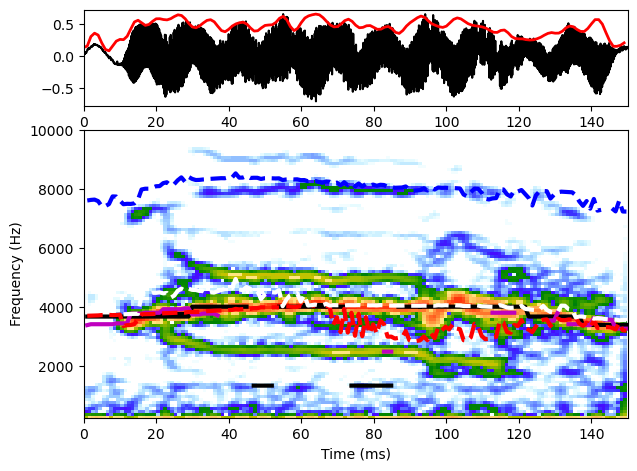

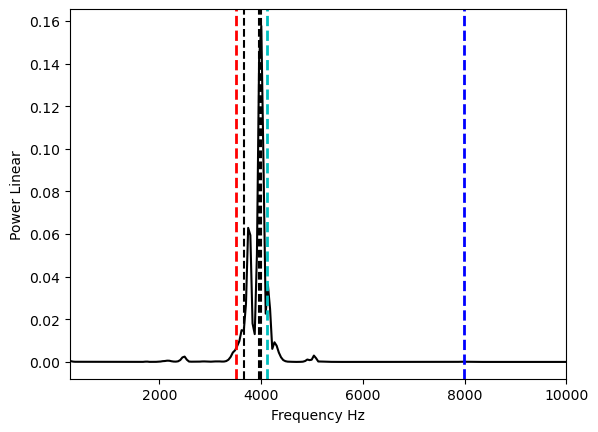

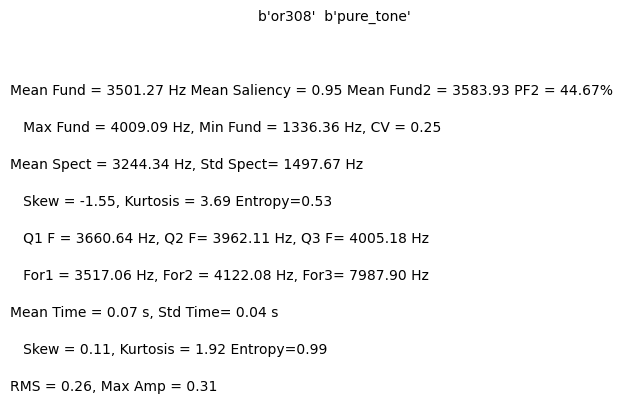

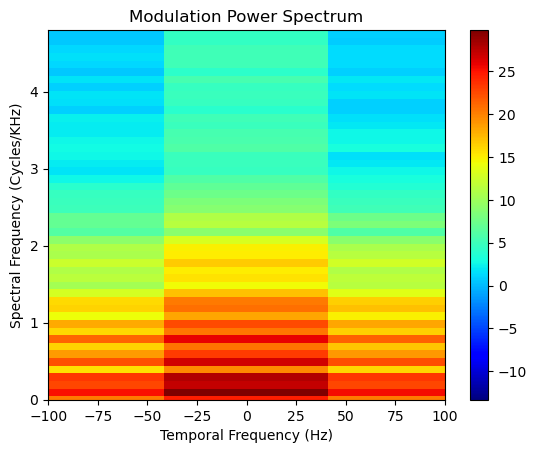

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [56]:
for file_name, time_index in zip(file_names,time_indexes):
    soundIN = WavFile(file_name)
    birdname = file_name.split('_')[0]
    calltype = 'pure_tone'
    soundIN.plot()

    if normalize :
        maxAmp = np.abs(soundIN.data).max() 
    else:
        maxAmp = 1.0

    # start_index = .45
    # stop_index = .485

    syllable = soundIN.data[int(time_index[0]*soundIN.sample_rate):int(time_index[1]*soundIN.sample_rate)]
    print(f'syllabe length: {len(syllable)}, tiem points: {int(time_index[0]*soundIN.sample_rate), int(time_index[1]*soundIN.sample_rate)}')
    # Create BioSound Object
    myBioSound = BioSound(soundWave=syllable.astype(float)/maxAmp, fs=float(soundIN.sample_rate), emitter=birdname, calltype = calltype)
            
    # Calculate the spectrogram and the rms
    myBioSound.spectroCalc(spec_sample_rate=1000, freq_spacing = 100, min_freq=0, max_freq=10000)
    myBioSound.rms = myBioSound.sound.std() 

    # Calculate amplitude enveloppe
    myBioSound.ampenv(cutoff_freq = 200, amp_sample_rate = 1000)

    # Calculate the power spectrum
    myBioSound.spectrum(f_high=10000)

    # Calculate fundamental and related values.  These are the default values.
    # For the estimation of the fundamental, four methods are available: 
    # 'AC' - Peak of the auto-correlation function
    # 'ACA' - Peak of envelope of auto-correlation function 
    # 'Cep' - First peak in cepstrum 
    # 'Stack' - Fitting of harmonic stacks (default - works well for zebra finches)

    myBioSound.fundest(maxFund = 6000, minFund = 300, lowFc = 200, highFc = 10000, 
                        minSaliency = 0.5, debugFig = 0, 
                        minFormantFreq = 500, maxFormantBW = 500, windowFormant = 0.1,
                        method='AC')

    # Calculate the MPS
    myBioSound.mpsCalc(window=0.01, Norm = True)
                
    # save the H5 file / biosuoound object
    # myBioSound.saveh5(os.path.join(base_folder, 'h5filesAmp', 'bird_%s_call_%s_%s.h5' % (birdname, calltype, row_num)))

    if plotMe: 
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('                Bird %s    Call Type %s' % (myBioSound.emitter, myBioSound.type))
        myBioSound.plot(DBNOISE=50, f_low=250, f_high=10000)  
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')